[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/Joelrrdavis/UF_QMB3302/blob/main/code/notebooks/09_decision_trees.ipynb)


# Decision Trees


## Introduction to Decision Trees

### Definition and Overview

Decision Trees are a type of supervised learning algorithm that is used for both classification and regression tasks. They are called "Decision Trees" because the model uses a tree-like structure of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It's a way of visually and explicitly representing decisions and decision making.

In simpler terms, a Decision Tree starts with a single node, which branches into possible outcomes. Each of those outcomes leads to additional nodes, which branch off into other possibilities. This continues until a decision reaches a leaf node, which represents a classification or decision. The paths from root to leaf represent classification rules or regression paths.

### Applications of Decision Trees

Decision Trees are versatile and can be used in various fields, including:

* Business Management: For decision analysis, to visualize complex decisions and identify the most effective strategy.
* Finance: For credit scoring, determining loan approval, and predicting bankruptcy.
* Healthcare: For diagnosing patients based on their symptoms.
* Manufacturing and Production: For quality control and predicting equipment failures.
* Marketing: For customer segmentation, retention strategies, and predicting customer behavior.

### Advantages and Disadvantages

#### Advantages:

* Easy to Understand and Interpret: Trees can be visualized, making them easy to explain even to non-technical stakeholders.
* Requires Little Data Pre-processing: Unlike many other algorithms, decision trees do not require normalization of data.
* Can Handle Both Numerical and Categorical Data: They are versatile in handling various data types.
* Can Handle Multi-output Problems: Decision Trees can predict multiple variables with the same dataset.

#### Disadvantages:

* Overfitting: Decision Trees can create over-complex trees that do not generalize well from the training data.
* Variance: Small variations in the data can result in a completely different tree being generated.
Bias: Decision Trees with little data can be biased towards the classes that have more instances.

### Example:

To illustrate how decision trees work with Python, we will generate a synthetic dataset and implement a simple decision tree classifier using the scikit-learn library.



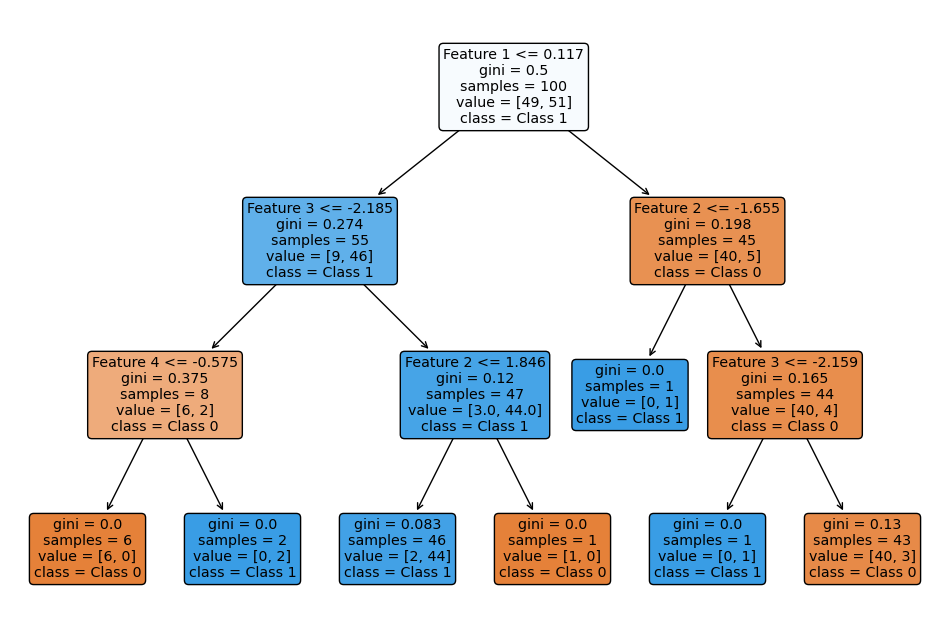

In [1]:
#Example: Creating a Synthetic Dataset and Building a Decision Tree
# Import libraries
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=4, n_informative=3, n_redundant=1, random_state=1955)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=1955)

# Fit the model
clf.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, rounded=True, class_names=["Class 0", "Class 1"], feature_names=["Feature 1", "Feature 2", "Feature 3", "Feature 4"])
plt.show()


**In this example:**

* We use `make_classification` from `sklearn.datasets` to generate a synthetic dataset suitable for a classification problem.
* We create a `DecisionTreeClassifier` instance with a maximum depth of 3 to prevent overfitting. The `random_state` parameter ensures reproducibility of our results.
* After fitting the model to our dataset, we use `plot_tree` to visualize the decision tree. The visualization includes the decision nodes, the conditions for splitting, and the class distributions at each node.

## Understanding the basics

### How Decision Trees Work

A decision tree makes decisions by splitting data into branches based on feature values. These decisions or splits are made at nodes, starting with the root node and proceeding to internal nodes and leaf nodes. The choice of which feature to split on at each node is determined by metrics such as entropy, information gain, or Gini impurity.

* **Root Node:** Represents the entire dataset, which then gets divided into two or more homogeneous sets.
* **Splitting:** Process of dividing a node into two or more sub-nodes based on certain conditions.
* **Decision Node:** After splitting, the sub-nodes become decision nodes, which can then be split further.
* **Leaf/Terminal Node:** Nodes that do not split further, representing the output or class.

### Concept of Entropy and Information Gain

#### Entropy

Entropy is a measure of the randomness or uncertainty in the data. In the context of decision trees, it's used to measure the impurity or disorder of a set of examples. Information gain is based on the decrease in entropy after a dataset is split on an attribute. It's used to decide which feature to split on at each step in building the tree.

**Entropy Forumla:**

$
\text{Entropy}(S) = -\sum_{i=1}^{n} p_i \log_2(p_i)
$

where $S$ is the set for which entropy is being calculated, $n$ is the number of classes, and $p_i$ is the proportion of the examples in the set that belong to class $i$


Information Gain: The change in entropy before and after the split. A feature with the highest information gain is chosen for the split.

#### Gini Impurity

Gini Impurity is an alternative to entropy and is used to measure how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Decision trees use the Gini impurity index to build the most discriminative branches.

**Gini Impurity formula:**

$
\text{Gini}(S) = 1 - \sum_{i=1}^{n} p_i^2
$

where $S$ is the set for which Gini is being calculated, $n$ is the number of classes, and $p_i$ is the proportion of the examples in the set that belong to class $i$
​	
#### Example of entropy and Gini  impurity

In [2]:
import numpy as np

# Function to calculate entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

# Function to calculate Gini impurity
def gini_index(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    gini = 1 - np.sum([(counts[i]/np.sum(counts))**2 for i in range(len(elements))])
    return gini

# Example target column
target_col = [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]

# Calculate and print entropy and Gini impurity
print("target_col values:", target_col)
print("Entropy of target column:", entropy(target_col))
print("Gini Impurity of target column:", gini_index(target_col))

#new columns (less entropy and impurity)
# in the code below I select all values equal to 1 or 0 and create a new list
new0 = [value for value in target_col if value == 0]
new1 = [value for value in target_col if value == 1]


target_col values: [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]
Entropy of target column: 1.0
Gini Impurity of target column: 0.5


In [3]:
#new columns (less entropy and impurity)
# in the code below I select all values equal to 1 or 0 and create a new list
new0 = [value for value in target_col if value == 0]
new1 = [value for value in target_col if value == 1]

print("new0:", new0)
print("Entropy of target column:", entropy(new0))
print("Gini Impurity of target column:", gini_index(new0))

print("new1:", new1)
print("Entropy of target column:", entropy(new1))
print("Gini Impurity of target column:", gini_index(new1))

new0: [0, 0, 0, 0, 0]
Entropy of target column: 0.0
Gini Impurity of target column: 0.0
new1: [1, 1, 1, 1, 1]
Entropy of target column: 0.0
Gini Impurity of target column: 0.0


## Decision Tree Algorithms

There are several approaches to creating decision trees. For the most part these various approaches are out of scope. 

scikit-learn's DecisionTreeClassifier and DecisionTreeRegressor use an optimized version of the CART algorithm, the principles remain similar across different decision tree algorithms.

Alternatives you can look up (if interested) include:
* D3 Algorithm (Iterative Dichotomiser 3)
* C4.5 Algorithm (Successor of ID3)
* CART (Classification and Regression Trees)

### Classification- Iris Data Set

We have 2 type of decision trees-- Classification and regression. In classification we are trying to determine a specific class of outcomes. 

This is a replica example from the text
 
Let's build a super basic tree. For this quick example, we'll use the data from scikit learn, because it is already in the form we need it in. We will also ignore some of the need for validation and testing, so we can focus just on the model. We'll get to validation and scoring trees a little later. 

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets #importing iris so we can get right to the heart of this section


In [5]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [6]:
model = DecisionTreeClassifier(random_state=1955)

In [7]:
#running the model
treemodel = model.fit(X, y)

In [8]:
# a new observation
flower1 = [[1, 1, 2, 2]]
model.predict(flower1)

array([0])

In [9]:
model.predict_proba(flower1)

array([[1., 0., 0.]])

#### More Iris...

Now that we have the gist... we should go through this a little slower, and spend some more time with the model

In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

load_df = load_iris()
df = pd.DataFrame(load_df['data'],columns=['petal_length','petal_width','sepal_length','sepal_width'])
df['species'] = load_df['target']
df['species'] = df['species'].apply(lambda x: load_df['target_names'][x])

In [11]:
df

,petal_length,petal_width,sepal_length,sepal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


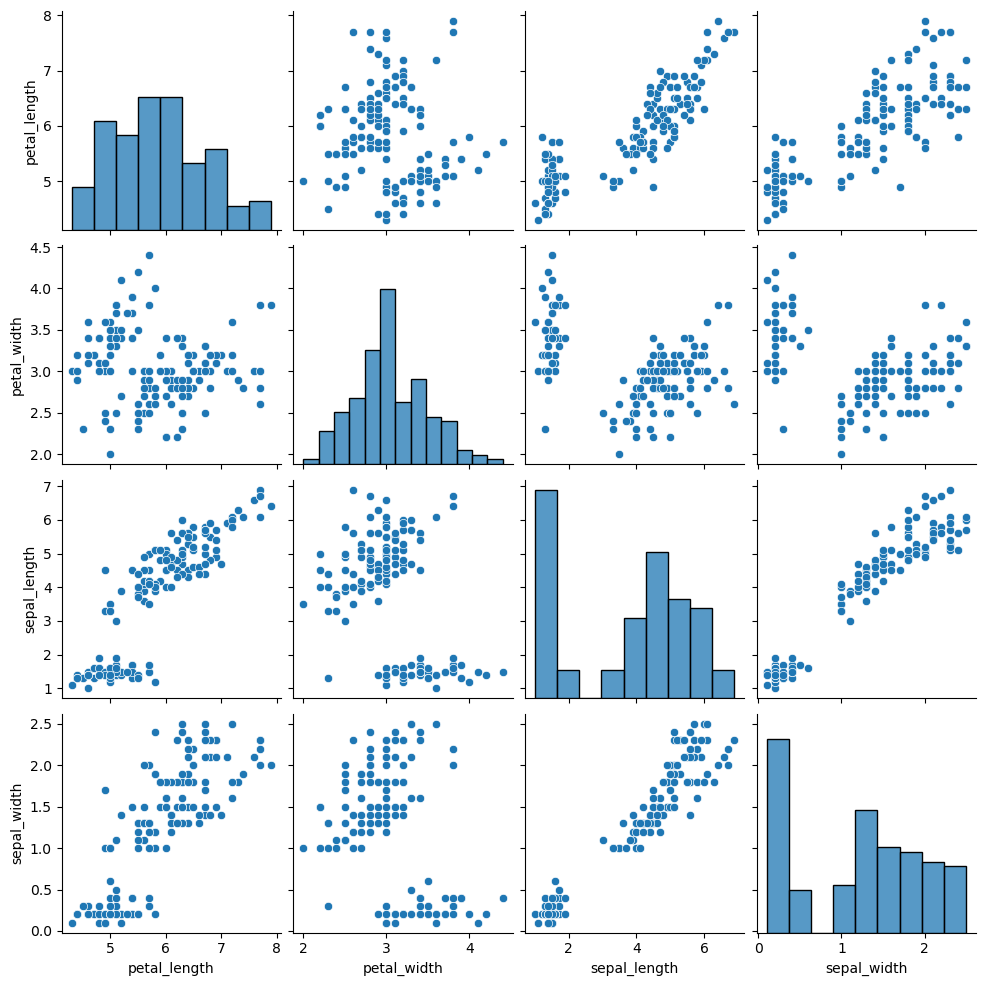

In [12]:
sns.pairplot(df)

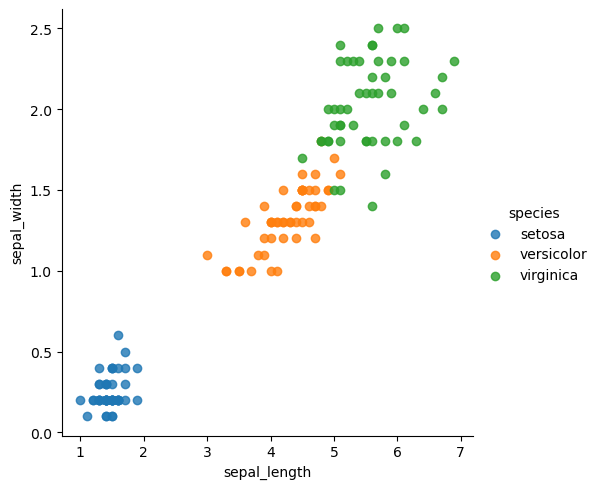

In [13]:
sns.lmplot(x='sepal_length', y='sepal_width',
           fit_reg=False,
           hue='species',
           data=df) 
plt.show()

In [14]:
df.columns

Index(['petal_length', 'petal_width', 'sepal_length', 'sepal_width',
       'species'],
      dtype='object')

In [15]:
X = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']] 
y = df['species']

#if you had a really long data set, this would be an inefficient way to seperate the param.
# here is an example of dropping a variable. We don't need z, just an example... 
z = df.drop(['species'], axis=1)



In [16]:
print('X shape:', X.shape)
print('z shape:', z.shape)
print('y shape:', y.shape)

X shape: (150, 4)
z shape: (150, 4)
y shape: (150,)


In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1957,
                                                train_size=0.7)

In [18]:
model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)
#model.score(ytrain, ytest)

DecisionTreeClassifier()

In [19]:
y_model = model.predict(Xtest)

In [20]:
from sklearn.metrics import accuracy_score
#accuracy of training data set
y_train_accur = model.predict(Xtrain)
accuracy_score(ytrain, y_train_accur)


1.0

In [21]:
#accuracy of test data set
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)


0.9555555555555556

In [22]:
#just a demo... no need to remember this...


iris = load_iris()
X = iris.data[:, 2:] 
y = iris.target

tree_clf = DecisionTreeClassifier(random_state=1957)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=1957)

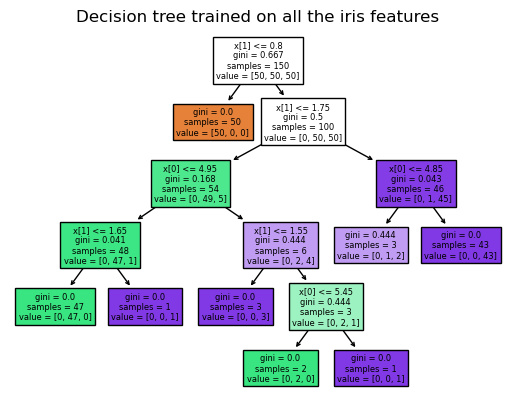

In [23]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree_clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

## Classification- Segments data set

This is another way of getting this done, but it requires loading a different package.The code here will only work if you install all the necessary packages. It is ok if you don't get that working though...running this code is optional!

From your Anaconda Prompt (or in Mac, using your terminal), type in the below.

`conda install -c conda-forge pydotplus`

You will also need a graphviz program to replicated the image of the tree. If you are on a mac I recommend the homebrew version of graphviz. If you have no idea what I am talking about... don't sweat it. This code is optional. 

In [24]:
#from graphviz import Source
#from IPython.display import display                               

import pydotplus
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

In [25]:

path = "../data/segments.csv"

seg = pd.read_csv(path)
seg.info(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            885 non-null    float64
 1   Income         853 non-null    float64
 2   Under18AtHome  1000 non-null   int64  
 3   HomeOwnership  1000 non-null   int64  
 4   subscribe      1000 non-null   int64  
 5   Segment        995 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [26]:
seg.head()

,age,Income,Under18AtHome,HomeOwnership,subscribe,Segment
0,45.0,50033.0,4,0,0,Suburban
1,25.0,10835.0,3,0,0,Urban
2,46.0,63281.0,1,0,0,Suburban
3,40.0,46201.0,2,1,0,Suburban
4,41.0,49343.0,1,1,0,Suburban


In [27]:
seg['age'] = seg['age'].fillna(seg['age'].mean())
seg['Income'] = seg['Income'].fillna(seg['Income'].median())
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1000 non-null   float64
 1   Income         1000 non-null   float64
 2   Under18AtHome  1000 non-null   int64  
 3   HomeOwnership  1000 non-null   int64  
 4   subscribe      1000 non-null   int64  
 5   Segment        995 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [28]:
seg = seg.dropna(subset=['Segment'])
seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            995 non-null    float64
 1   Income         995 non-null    float64
 2   Under18AtHome  995 non-null    int64  
 3   HomeOwnership  995 non-null    int64  
 4   subscribe      995 non-null    int64  
 5   Segment        995 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 54.4+ KB


In [29]:
X = seg.drop('Segment', axis=1)

y = seg['Segment']
print(X.shape)
print(y.shape)

(995, 5)
(995,)


In [30]:
dtree = DecisionTreeClassifier(max_depth= 5, random_state= 1955)

mod = dtree.fit(X, y)


In [31]:
mod.classes_

array(['ExSuburban', 'ExUrban', 'Suburban', 'Urban'], dtype=object)

In [32]:
dot_data = tree.export_graphviz(dtree,
                               out_file=None,
                               feature_names = X.columns,
                               class_names = ['ExSuburban', 'ExUrban', 'Suburban', 'Urban'])



In [33]:
graph = pydotplus.graph_from_dot_data(dot_data)

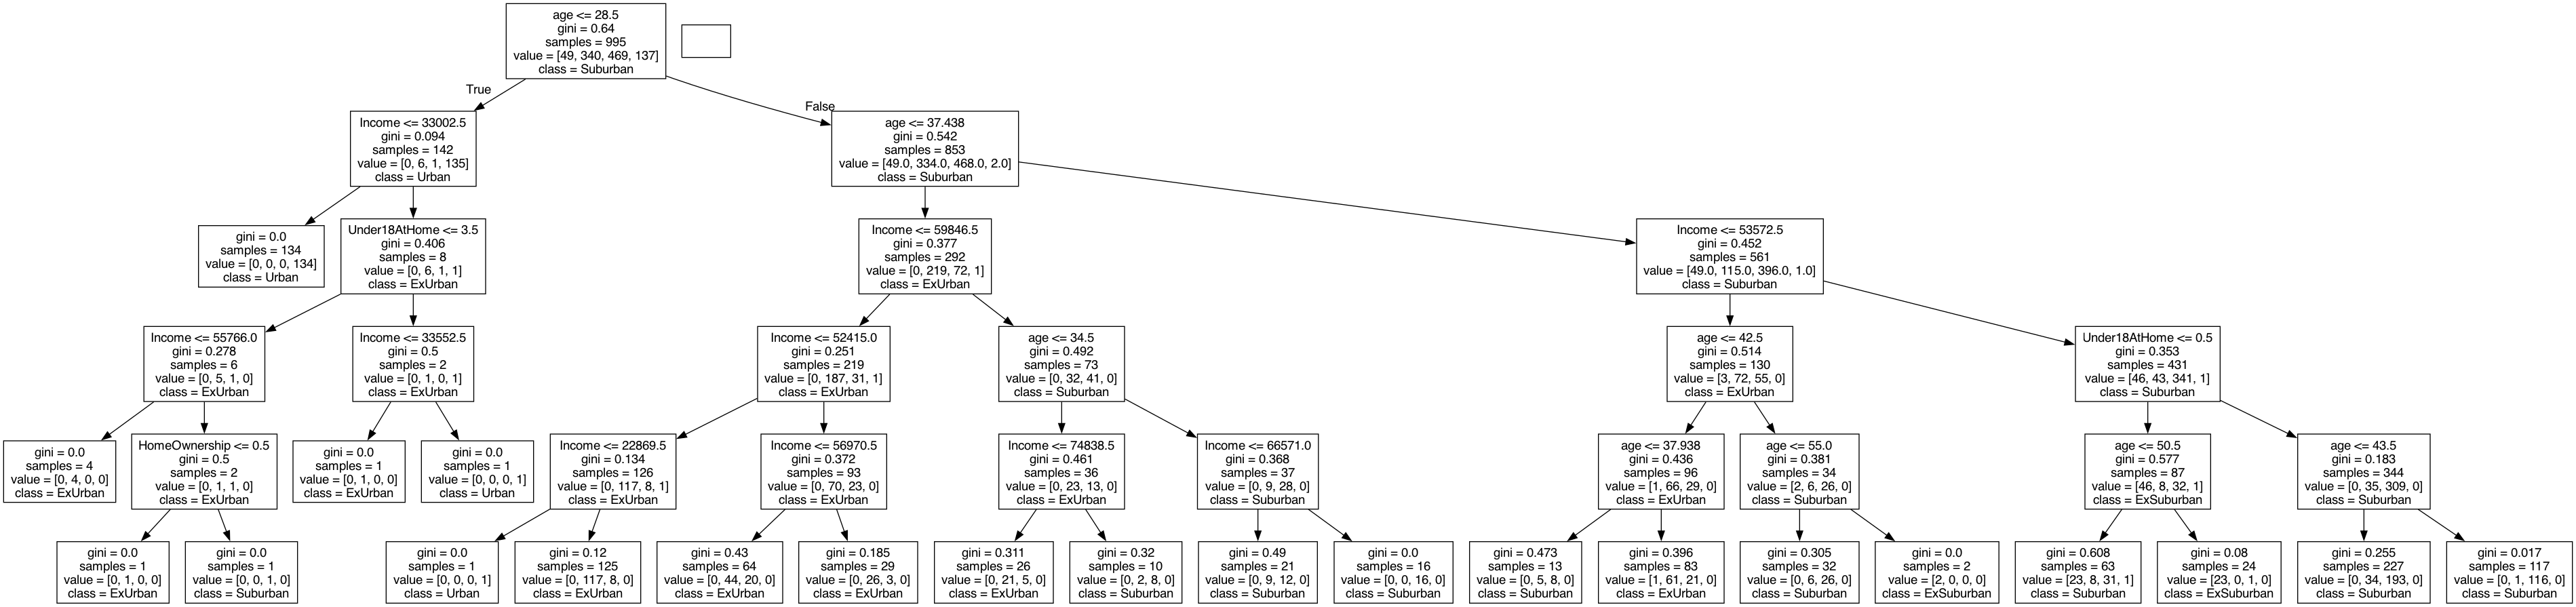

In [34]:
Image(graph.create_png())

#### What now

Well this tree is big... 




## Overfitting and Underfitting on Decision Trees

(this is stuff you need to know)

**Understanding Overfitting and Underfitting**

* Overfitting occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means the model is too complex, capturing noise in the training data.
* Underfitting occurs when a model cannot capture the underlying trend of the data. This typically happens when the model is too simple.

**Strategies to Avoid Overfitting:**

* Pruning: Reducing the size of decision trees by removing parts of the tree that do not provide additional power to classify instances. This can be done by setting constraints on tree size or by trimming nodes that add little predictive power.

* Setting Maximum Depth: Limit the depth of the tree to build a more generalized tree.

* Cross-Validation: Use cross-validation techniques to assess how the decision tree model will generalize to an independent dataset.

**Cross-Validation**

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The most common method is k-fold cross-validation.

* K-Fold Cross-Validation: The original sample is randomly partitioned into k equal sized subsamples. A single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data.

#### Example: Synthetic data set

We are going to build a fake (synthetic data set to practice this on.

The features include various customer behaviors and financial attributes, and the target variable is binary, indicating customer churn (0 for no churn, 1 for churn).

Features:
* Age: Customer's age.
* Annual_Income: Customer's annual income.
* Credit_Score: Customer's credit score.
* Debt_to_Income: Ratio of customer's debt to their income.
* Net_Worth: Customer's net worth.
* Years_with_Bank: Number of years the customer has been with the bank.
* No_of_Loans: Number of loans the customer has.
* No_of_Mortgages: Number of mortgages the customer has.
* Investment_Savings: Customer's savings from investments.
* Checking_Account_Balance: Balance in the customer's checking account.
* Account_Transactions: Number of transactions in the customer's account.
* Credit_Card_Debt: Amount of debt on the customer's credit card.
* Loan_Amount: Total amount of loans the customer has.
* Investment_in_Mutual_Fund: Customer's investment in mutual funds.
* Investment_in_Equity: Customer's investment in equity.
* Investment_in_Bond: Customer's investment in bonds.
* Credit_Card_Applications: Number of credit card applications by the customer.
* Online_Transactions: Number of online transactions made by the customer.
* Financial_Literacy_Score: Score representing the customer's understanding of financial matters.
* Shopping_Frequency: Frequency of shopping activities by the customer.

**Target Variable:**
* Customer_Churn: Indicates whether the customer has churned (1) or not (0).






In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Generate a synthetic dataset for a binary classification problem
Xgen, ygen = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1955, n_classes=2)

# Create column labels related to a business domain, e.g., customer behavior analysis
columns = ['Age', 'Annual_Income', 'Credit_Score', 'Debt_to_Income', 'Net_Worth',
           'Years_with_Bank', 'No_of_Loans', 'No_of_Mortgages', 'Investment_Savings',
           'Checking_Account_Balance', 'Account_Transactions', 'Credit_Card_Debt',
           'Loan_Amount', 'Investment_in_Mutual_Fund', 'Investment_in_Equity',
           'Investment_in_Bond', 'Credit_Card_Applications', 'Online_Transactions',
           'Financial_Literacy_Score', 'Shopping_Frequency']

# Convert the features into a DataFrame for easier manipulation
X = pd.DataFrame(Xgen, columns=columns)

# Convert the target into a DataFrame
y = pd.DataFrame(ygen, columns=['Customer_Churn'])

# Display the first few rows of the feature dataframe


print(X.shape)
print(y.shape)
X.head(), y.head()

(1000, 20)
(1000, 1)


(        Age  Annual_Income  Credit_Score  Debt_to_Income  Net_Worth  \
 0  0.160616       0.146210     -3.862802       -8.179537   1.053467   
 1 -4.417788      -1.852363     -0.848857       -6.976848  -2.549743   
 2 -0.032414       4.056175      0.464186        2.636165   1.460920   
 3 -1.947415       1.910054      3.302388       -0.301422  -0.196456   
 4 -0.031313       2.433247      0.912170        0.979844  -0.149041   
 
    Years_with_Bank  No_of_Loans  No_of_Mortgages  Investment_Savings  \
 0        -3.031427     0.260263         1.097073           -6.648538   
 1        -0.648297     2.470566        -0.320982           -3.259306   
 2        -2.962518     2.159247        -0.945022           -2.889092   
 3        -1.031009    -0.366176         1.649932           -2.194551   
 4        -4.031766     3.684984        -1.288550           -2.874158   
 
    Checking_Account_Balance  Account_Transactions  Credit_Card_Debt  \
 0                  0.580164             -4.716657    

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the synthetic dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1955)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=1955)

# Fit the model on the training set
dt_classifier.fit(Xtrain, ytrain)

# Predict on the test set
y_pred = dt_classifier.predict(Xtest)

# Evaluate the model in the next steps
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
conf_matrix = confusion_matrix(ytest, y_pred)

(accuracy, precision, recall, f1, conf_matrix)


(0.7866666666666666,
 0.7857142857142857,
 0.7960526315789473,
 0.7908496732026143,
 array([[115,  33],
        [ 31, 121]]))

### How good is this model?

There are multiple checks we can make here. 


#### Accuracy 

Accuracy measures the proportion of the total number of predictions that were correct. It is a good measure when the classes are balanced but can be misleading when class imbalance exists.


In [37]:
#accuracy of our model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


#### Precision and Recall
Precision (Positive Predictive Value) measures the proportion of positive identifications that were actually correct. Recall (Sensitivity, True Positive Rate) measures the proportion of actual positives that were identified correctly.

NOTE: That this only really works when the outcome is binary.

In [38]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(ytest, y_pred, average='binary')  # for binary classification
recall = recall_score(ytest, y_pred, average='binary')  # for binary classification
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.79
Recall: 0.80


#### F1 Score

The F1 score is the harmonic mean of precision and recall, providing a balance between the two. It is particularly useful when the classes are imbalanced.

In [39]:
from sklearn.metrics import f1_score
f1 = f1_score(ytest, y_pred, average='binary')  # for binary classification
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.79


#### Confusion Matrix

The confusion matrix provides a detailed breakdown of the classification outcomes, showing the true positives, false positives, true negatives, and false negatives.

In [40]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[115  33]
 [ 31 121]]


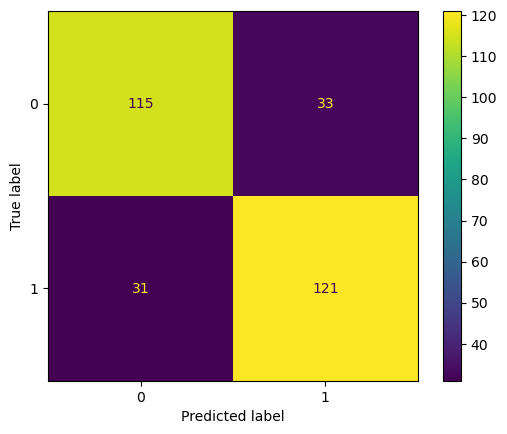

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(conf_matrix).plot()

#### Classification report

The classification report provides a summary of precision, recall, F1 score, and support for each class. It's a convenient way to get a comprehensive overview of the model's performance.

In [42]:
from sklearn.metrics import classification_report
class_report = classification_report(ytest, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       148
           1       0.79      0.80      0.79       152

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [43]:
# Perform 5-fold cross-validation for different scoring metrics
dclf = dt_classifier 
cv_scores_accuracy = cross_val_score(dclf, X, y.values.ravel(), cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(dclf, X, y.values.ravel(), cv=5, scoring='precision')
cv_scores_recall = cross_val_score(dclf, X, y.values.ravel(), cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(dclf, X, y.values.ravel(), cv=5, scoring='f1')

# Calculate the average scores across all folds
cv_accuracy_mean = np.mean(cv_scores_accuracy)
cv_precision_mean = np.mean(cv_scores_precision)
cv_recall_mean = np.mean(cv_scores_recall)
cv_f1_mean = np.mean(cv_scores_f1)

print("CV Accuracy Mean:", cv_accuracy_mean)
print("CV Precision Mean:", cv_precision_mean)
print("CV Recall Mean:", cv_recall_mean)
print("CV F1 Mean:", cv_f1_mean)

CV Accuracy Mean: 0.7809999999999999
CV Precision Mean: 0.7718467618666228
CV Recall Mean: 0.8013663366336635
CV F1 Mean: 0.7856949460121586


#### Okay--- altogether now

I have done this a piece at a time... but really you would put this altogther like so....


In [44]:
#import the packages we need
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt


# Split the synthetic dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1955)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=1955)

# Fit the model on the training set
dt_classifier.fit(Xtrain, ytrain)

# Predict on the test set
y_pred = dt_classifier.predict(Xtest)

# Evaluate the model 
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
conf_matrix = confusion_matrix(ytest, y_pred)

#print up the results
print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)
print("confusion_matrix:", conf_matrix)

# Perform 5-fold cross-validation for different scoring metrics
cv_scores_accuracy = cross_val_score(dclf, X, y.values.ravel(), cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(dclf, X, y.values.ravel(), cv=5, scoring='precision')
cv_scores_recall = cross_val_score(dclf, X, y.values.ravel(), cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(dclf, X, y.values.ravel(), cv=5, scoring='f1')

# Calculate the average scores across all folds
cv_accuracy_mean = np.mean(cv_scores_accuracy)
cv_precision_mean = np.mean(cv_scores_precision)
cv_recall_mean = np.mean(cv_scores_recall)
cv_f1_mean = np.mean(cv_scores_f1)

print("CV Accuracy Mean:", cv_accuracy_mean)
print("CV Precision Mean:", cv_precision_mean)
print("CV Recall Mean:", cv_recall_mean)
print("CV F1 Mean:", cv_f1_mean)


accuracy: 0.7866666666666666
precision: 0.7857142857142857
recall: 0.7960526315789473
f1: 0.7908496732026143
confusion_matrix: [[115  33]
 [ 31 121]]
CV Accuracy Mean: 0.7809999999999999
CV Precision Mean: 0.7718467618666228
CV Recall Mean: 0.8013663366336635
CV F1 Mean: 0.7856949460121586


#### Interpreting our results

**CV Accuracy Mean: 0.796**

Interpretation: On average, the model correctly predicts whether a customer will churn or not about 79.6% of the time across the different folds in cross-validation. This suggests a relatively high level of overall prediction correctness, but it's also essential to consider other metrics for a more nuanced view, especially in the presence of class imbalances.

**CV Precision Mean: 0.788**

Interpretation: The model's precision score tells us that, when it predicts a customer will churn, it is correct approximately 78.8% of the time. High precision indicates a lower false positive rate, meaning the model is reliable in its positive predictions (churn predictions in this context).

**CV Recall Mean: 0.811**

Interpretation: The recall score indicates that the model successfully identifies about 81.1% of all actual churn cases. High recall is particularly important in scenarios where missing out on true positives (actual churn cases) has a higher cost than false positives, such as in customer retention strategies.

**CV F1 Mean: 0.799**

Interpretation: The F1 score is a harmonic mean of precision and recall, providing a single metric to assess the balance between them. An F1 score of approximately 79.9% suggests that the model has a good balance between precision and recall. This is crucial when you want to ensure that the increase in model sensitivity (recall) does not come at a significant cost to its specificity (precision).

**Overall Interpretation:**

The cross-validation results suggest that the decision tree model has a solid performance on the synthetic dataset, with a good balance between accuracy, precision, recall, and F1 score. It is capable of identifying a high proportion of actual churn cases while maintaining a reliable level of precision in its predictions.

However, depending on the business context and the cost of false positives (incorrect churn predictions) versus false negatives (missed churn predictions), you might prioritize improving specific metrics further. For instance, if the cost of false negatives is high (missing out on identifying potential churn could lead to significant revenue loss), you might seek to improve recall even if it slightly lowers precision.

It's also important to consider the model's performance in the context of the problem's complexity and the dataset's characteristics. If the dataset is highly imbalanced or if there are many more features that could explain the variance in the target variable, you might explore more complex models or feature engineering techniques to improve performance.

Overall, the decision tree model appears to be a strong baseline for predicting customer churn in this synthetic dataset. 

# Random Forests-- (many trees) 

The Random Forest algorithm is an ensemble learning method used for both classification and regression tasks. It builds upon the concept of decision trees, but instead of relying on a single decision tree, it creates a "forest" of them to improve prediction accuracy and control overfitting. Here's a detailed explanation of how Random Forest algorithms work:

**Bootstrap Aggregating (Bagging)**

Random Forest utilizes the bootstrap aggregating (or bagging) technique, where multiple subsets of the original dataset are created with replacement (meaning the same data point can appear in a subset more than once). Each subset is used to train a separate decision tree. This process increases the diversity among the trees, which helps in reducing the variance of the model's predictions.

**Building Multiple Decision Trees**

For each of the subsets created during the bagging process, a decision tree is built. However, Random Forest adds an extra layer of randomness to this process: instead of searching for the most significant feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide variety of trees, which contributes to the robustness of the model.

**Prediction**

* Classification Tasks: For a classification problem, each tree in the forest outputs a class prediction, and the final output prediction is the class that receives the majority vote among all the trees in the forest.
* Regression Tasks: For regression, each tree predicts a continuous value, and the final output is typically the average of all the trees' predictions.


**Advantages of Random Forest**

* Accuracy: Random Forests tend to be highly accurate; combining the predictions of multiple trees tends to cancel out their individual errors, provided the trees are not correlated. By using a subset of features at each split, Random Forest ensures that the trees are de-correlated.
* Overfitting Control: The algorithm is less prone to overfitting compared to individual decision trees because it averages multiple trees' predictions.
* Handling Large Data Sets with Higher Dimensionality: They can handle thousands of input variables without variable deletion and are effective even when most of the features are categorical.

**Feature Importance**

An added benefit of Random Forest is its ability to rank the importance of features based on how often they contribute to the improvement in a tree's performance. This is useful for feature selection and understanding the driving factors behind the model's predictions.

**Summary**

The Random Forest algorithm creates a set of decision trees from randomly selected subsets of the training set and then aggregates their predictions. This process improves prediction accuracy and robustness, making Random Forest a powerful tool for a wide range of machine learning tasks. Its ability to provide insights into feature importance further adds to its appeal in exploratory analysis and model interpretability.

### Random Forest Regression

Here we have a number of categorical and integer variables, and we want to build a model using a random forest algorithm. We can use pipelines to help with this (see prior weeks notebooks for examples of this).

We will do a regression with random forest in this example.



In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 



In [46]:
# load the data for this example
path = "../data/ames.csv"
ames = pd.read_csv(path)
ames = ames.loc[(ames.Gr_Liv_Area < 4000) & (ames.Sale_Price < 300000)]


X = ames[['Gr_Liv_Area','Total_Bsmt_SF', 'Garage_Cars','Neighborhood']]  
y = ames['Sale_Price']

In [47]:
# Column transformers

numeric_features = [
 'Gr_Liv_Area',
 'Total_Bsmt_SF',
 'Garage_Cars'
 ]


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))    
    ])
numeric_features

['Gr_Liv_Area', 'Total_Bsmt_SF', 'Garage_Cars']

In [48]:
categorical_features = ['Neighborhood']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [50]:
from sklearn.ensemble import RandomForestRegressor


rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(3000))])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1957, test_size=0.3)

rf_clf.fit(X_train, y_train)

y_model_rf = rf_clf.predict(X_test)


# The coefficients
#print('Coefficients: \n', rf_clf.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_model_rf))
print('RMSE : %.2f'
      % np.sqrt(mean_squared_error(y_test, y_model_rf)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_model_rf))

Mean squared error: 624713949.66
RMSE : 24994.28
Coefficient of determination: 0.76


## Random forest for classification

For this example we will use the same synthetic data we used for decision trees. 

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Generate a synthetic dataset for a binary classification problem
Xgen, ygen = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1955, n_classes=2)

# Create column labels related to a business domain, e.g., customer behavior analysis
columns = ['Age', 'Annual_Income', 'Credit_Score', 'Debt_to_Income', 'Net_Worth',
           'Years_with_Bank', 'No_of_Loans', 'No_of_Mortgages', 'Investment_Savings',
           'Checking_Account_Balance', 'Account_Transactions', 'Credit_Card_Debt',
           'Loan_Amount', 'Investment_in_Mutual_Fund', 'Investment_in_Equity',
           'Investment_in_Bond', 'Credit_Card_Applications', 'Online_Transactions',
           'Financial_Literacy_Score', 'Shopping_Frequency']

# Convert the features into a DataFrame for easier manipulation
X = pd.DataFrame(Xgen, columns=columns)

# Convert the target into a DataFrame
y = pd.DataFrame(ygen, columns=['Customer_Churn'])


In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1955)

# Initialize and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1955)
rf_classifier.fit(X_train, y_train.values.ravel())

# Predict on the test set and evaluate
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Perform 5-fold cross-validation for accuracy
cv_scores_rf_accuracy = cross_val_score(rf_classifier, X, y.values.ravel(), cv=5, scoring='accuracy')
cv_accuracy_mean_rf = np.mean(cv_scores_rf_accuracy)

print("accuracy:", accuracy_rf)
print("cross-validated accuracy:", cv_accuracy_mean_rf)


accuracy: 0.9066666666666666
cross-validated accuracy: 0.8939999999999999
